In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt




In [30]:
female_births = pd.read_csv("../Lessons/lesson_1/Series/daily-total-female-births-in-cal.csv")
sales_of_company_x = pd.read_csv("../Lessons/lesson_1/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("../Lessons/lesson_1/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("../Lessons/lesson_1/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("../Lessons/lesson_1/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("../Lessons/lesson_1/Series/weekly-closings-of-the-dowjones-.csv")

In [31]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

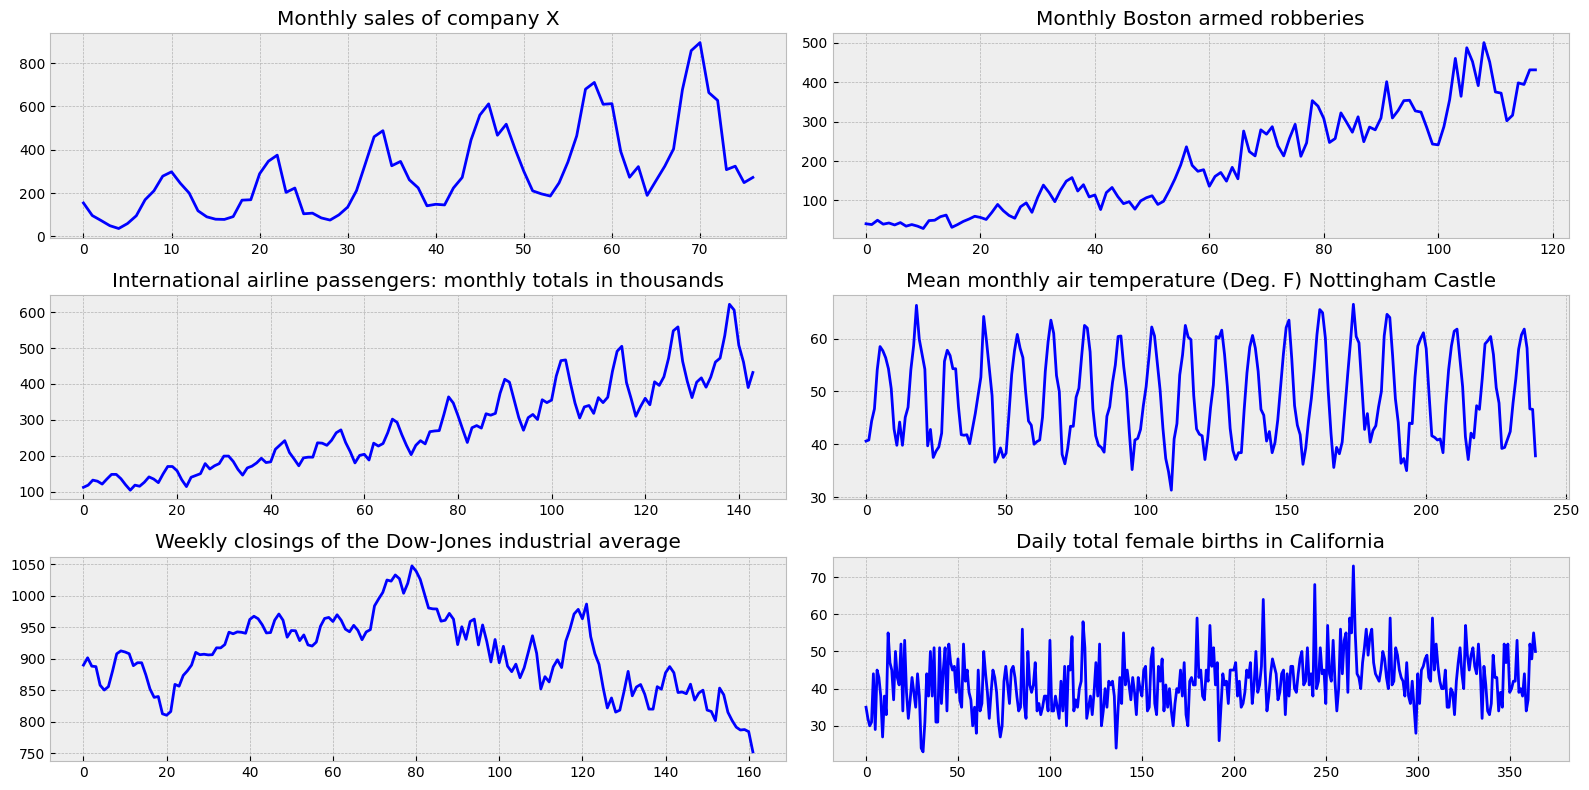

In [32]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [33]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [34]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


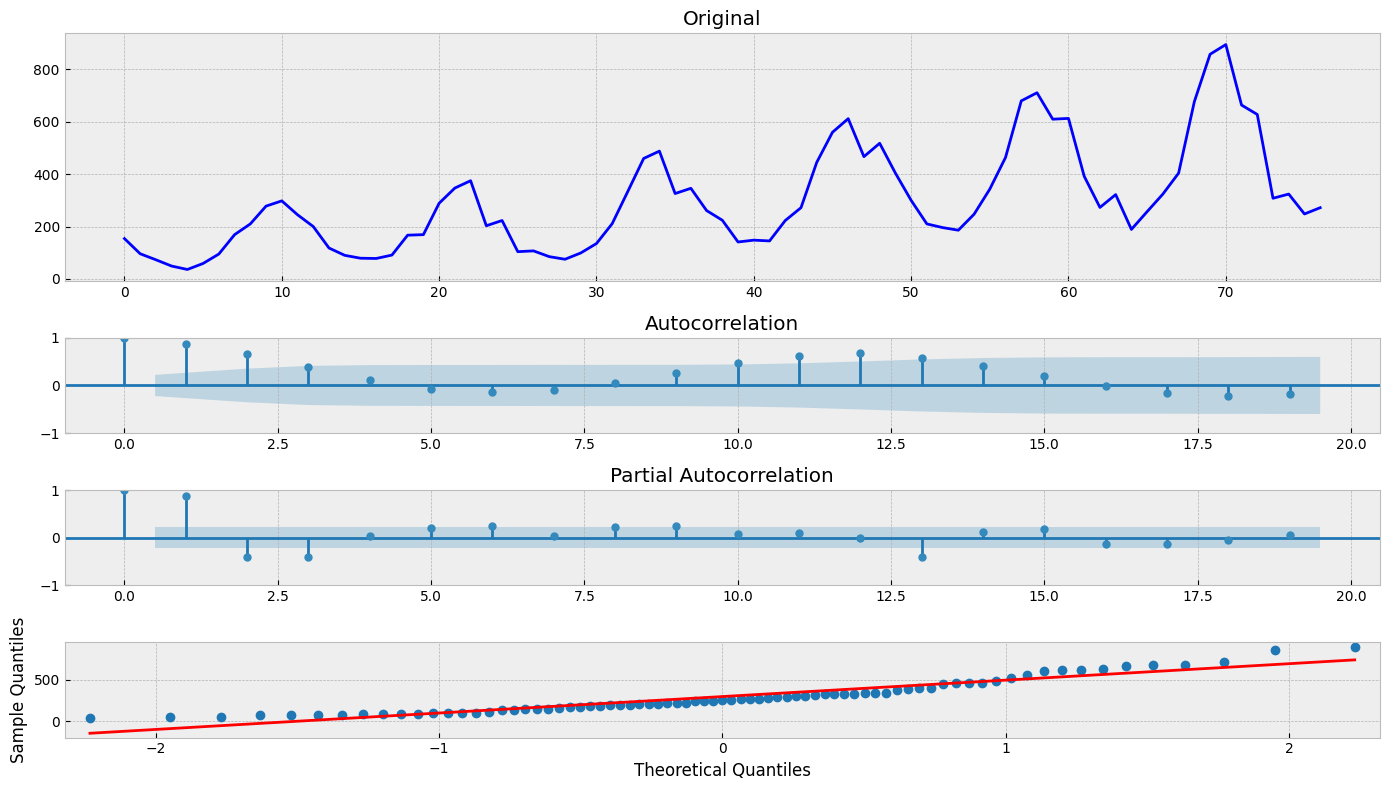

In [35]:
series = all_series["Monthly sales of company X"]
tsplot(series)


/home/vyacheslav/Documents/GitHub/Netology_education/Time series/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/vyacheslav/Documents/GitHub/Netology_education/Time series/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/vyacheslav/Documents/GitHub/Netology_education/Time series/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/vyacheslav/Documents/GitHub/Netology_education/Time series/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/

aic: 853.71501 | order: (4, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -1.910458
p-value                         0.327157
#Lags Used                     11.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


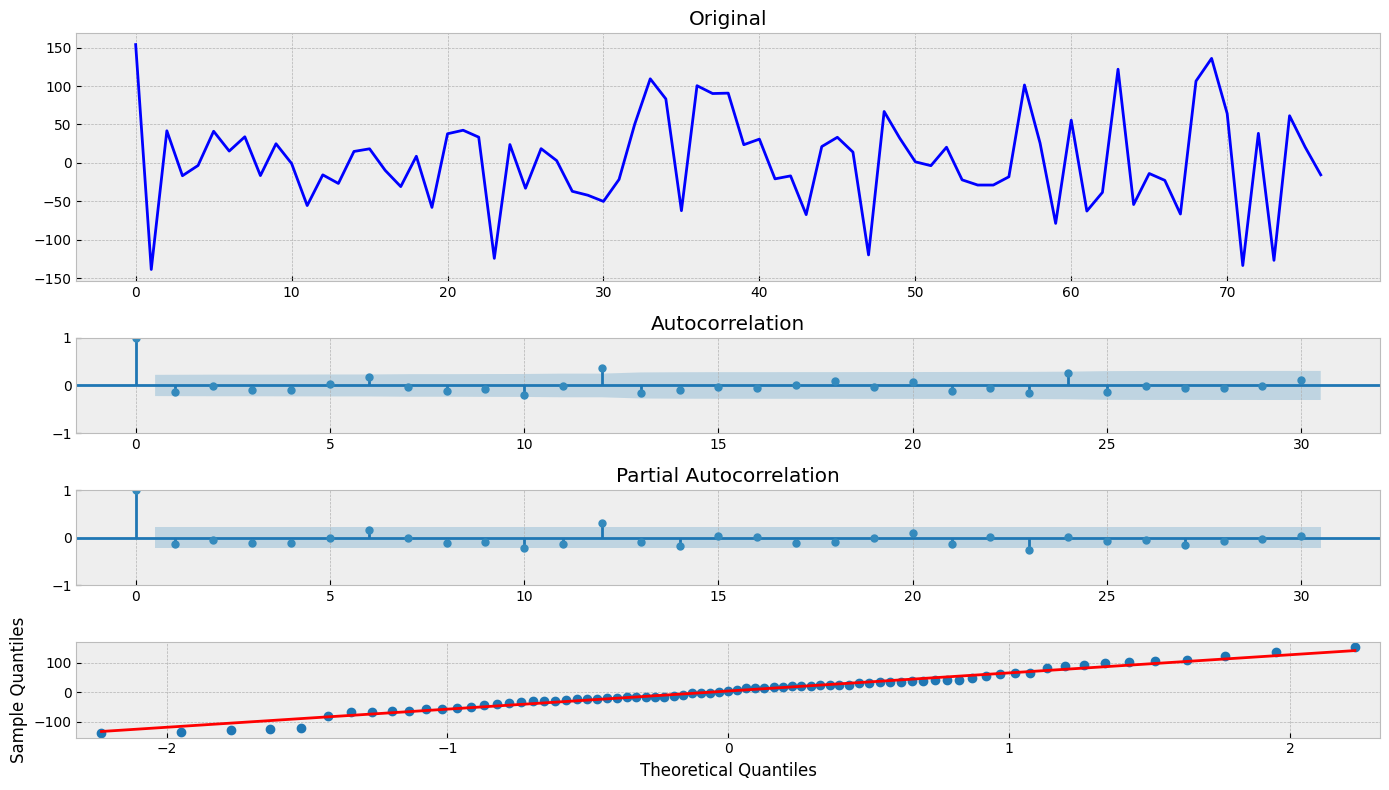

In [36]:
# Подбор параметров (p, d, q)
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5): 
        for j in range(5):
            try:
                tmp_mdl = ARIMA(series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

tsplot(best_mdl.resid, lags=30)
plt.show()

Остатки стационарны, Всю информацию из временного ряда получили

In [37]:
best_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                   77
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -418.858
Date:                Wed, 19 Jun 2024   AIC                            853.715
Time:                        15:33:18   BIC                            872.255
Sample:                             0   HQIC                           861.118
                                 - 77                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3033      0.117     11.182      0.000       1.075       1.532
ar.L2         -0.3017      0.180     -1.674      0.094      -0.655       0.051
ar.L3         -0.3739      0.167     -2.245      0.025      -0.700      -0.047
ar.L4         -0.0267      0.105     -0.254      0.800      -0.233       0.179
ma.L1         -2.8999      0.183    -15.819      0.000      -3.259      -2.541
ma.L2          2.8968      0.362      8.011      0.000       2.188       3.605
ma.L3         -0.9965      0.183     -5.439      0.000      -1.356      -0.637
sigma2      3120.4025      0.000   9.19e+06      0.000    3120.402    3120.403
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.64   Prob(JB):                         0.90
Heteroskedasticity (H):               4.60   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+22. Standard errors may be unstable.
"""

Построим визуализации прогнозов

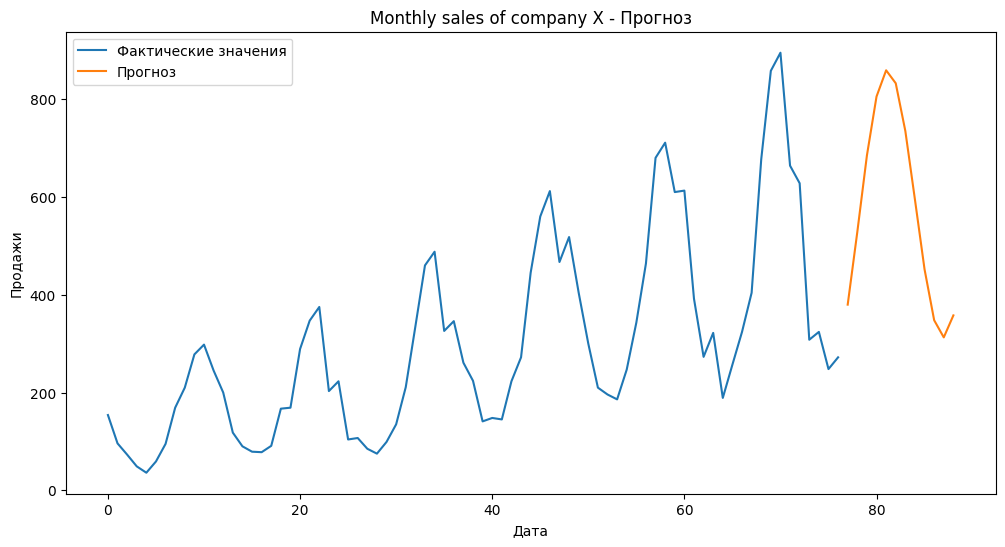

In [38]:
predictions = best_mdl.predict(start=len(series), end=len(series) + 11)

plt.figure(figsize=(12, 6))
plt.plot(series, label='Фактические значения')
plt.plot(predictions, label='Прогноз')
plt.title('Monthly sales of company X - Прогноз')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()


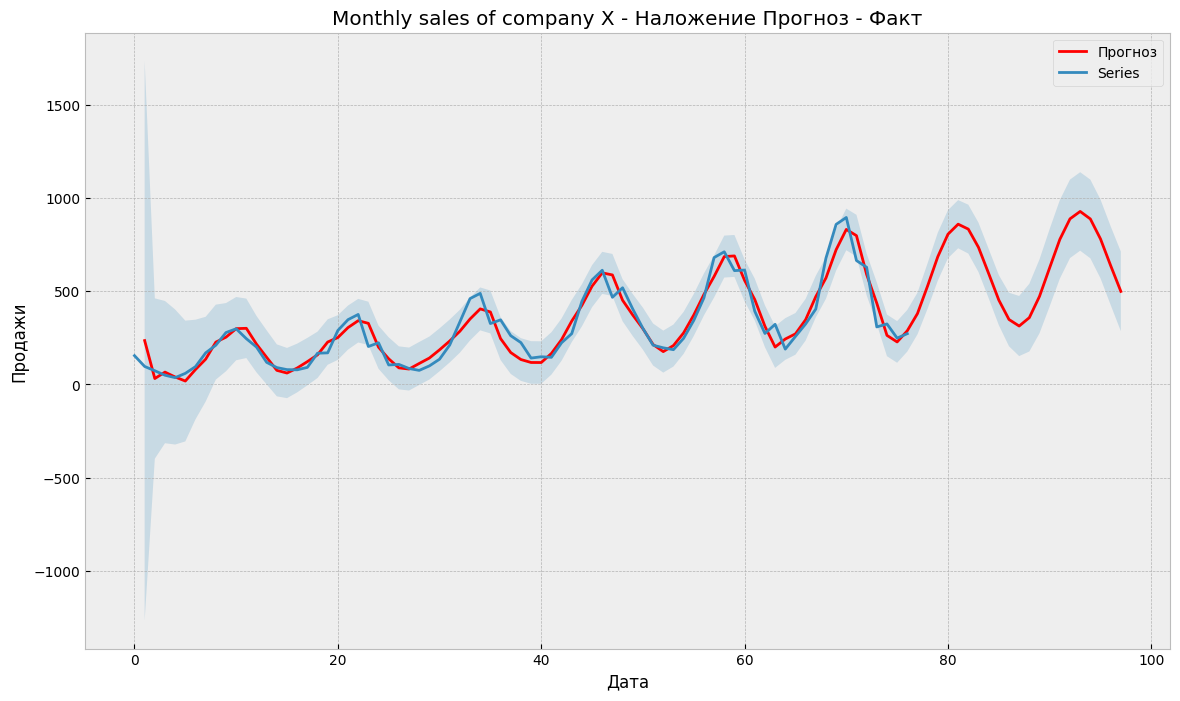

In [43]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    
    #  Получаем DataFrame с прогнозом
    predictions = best_mdl.get_prediction(start=1, end=len(series) + 20)
    predictions_df = predictions.summary_frame()

    # Строим график прогноза
    plt.plot(predictions_df['mean'], color='red', label='Прогноз')
    plt.fill_between(predictions_df.index, predictions_df['mean_ci_lower'], predictions_df['mean_ci_upper'], alpha=0.2)

    # Добавляем фактические значения
    plt.plot(series, label='Series')

    plt.title('Monthly sales of company X - Наложение Прогноз - Факт')
    plt.xlabel('Дата')
    plt.ylabel('Продажи')

    plt.legend()
    plt.show()